<a href="https://colab.research.google.com/github/kim-hyun-ho/study/blob/main/210421.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#https://www.kaggle.com/c/prudential-life-insurance-assessment
#푸루덴셜 보험 문제

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

In [3]:
data = pd.read_csv("/content/drive/MyDrive/insurance/train.csv")

data

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.00000,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.00000,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.00000,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.00000,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.00000,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,0.020,1,3,0.00000,3,0.0250,1,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.217391,NaN,0.197183,NaN,0.0,261,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,0.100,9,1,0.00001,2,0.3500,1,2,3,3,1,1,1,2,1,3,2,0.000267,1,3,2,3,0.565217,NaN,0.478873,NaN,24.0,491,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,0.360969,0.035,9,1,0.00000,2,NaN,1,2,6,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.173913,NaN,0.126761,NaN,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,0.276151,0.462452,0.038,9,1,NaN,3,NaN,1,2,3,3,1,2,1,2,1,1,3,NaN,3,2,3,2,NaN,0.372549,0.704225,NaN,0.0,16,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8


In [4]:
#id는 드롭하다
data = data.drop(['Id'],axis=1)

In [5]:
#상관 관계를 보자
#디폴트는 피어슨 상관계수구나.
#의미는 -1 ~ 1 양의 음의 상관 관계 0은 무관
data.corr()

# 피어슨 선형 상관관계로 볼때
# 보험정보4, 나이, bmi, 직장3, 보험정보6 보험이력2, 의료1, 의료이력4 등은 관계가 크고
# 그 외 직장, 가족력 등은 그다지 크지 않은것 같다.
# 상관관계는 인과관계는 아닐수도 있다.

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Product_Info_1,1.000000,0.027573,0.059829,0.069720,-0.078684,0.012169,-0.077429,0.052720,-0.004035,-0.037130,0.047371,0.032271,-0.039832,0.008507,-0.018840,0.011871,-0.041654,0.002911,0.002709,-0.047523,0.013376,-0.047975,0.011357,0.013058,0.007242,-0.008187,0.015076,0.010613,0.006753,0.012547,0.008191,-0.001294,-0.054089,-0.017769,-0.056415,-0.013988,0.022124,0.005200,-0.017654,-0.022528,...,-0.002277,0.010436,0.004590,-0.001816,0.000856,-0.036699,-0.002719,-0.000372,0.008864,-0.007173,0.004998,0.007143,0.001019,0.055918,-0.001985,-0.018417,0.004536,-0.005395,-0.004660,-0.008189,-0.008202,-0.008154,0.002827,-0.006149,0.001988,-0.003620,-0.004441,0.007081,-0.007272,0.002378,-0.002782,0.004495,-0.007697,-0.014055,-0.008247,-0.006719,-0.010638,0.004402,-0.008469,0.014692
Product_Info_3,0.027573,1.000000,0.048775,0.025419,-0.018855,0.015581,0.001005,0.293546,0.213546,0.083288,0.151442,0.191771,-0.241939,-0.026332,-0.764707,-0.005204,-0.033652,0.019398,-0.004991,-0.056197,0.026939,-0.398228,0.029694,0.009949,0.010795,0.033448,-0.022591,0.020219,-0.038518,0.038793,-0.032734,0.020843,-0.010492,0.010921,-0.001724,0.006095,0.009945,-0.033661,-0.041289,-0.090907,...,-0.003771,-0.007156,0.006308,0.010818,0.000538,0.027053,-0.005535,-0.030666,0.002734,-0.002748,-0.006718,0.001512,0.006785,0.055625,0.038076,0.026242,0.006381,-0.016673,-0.006696,-0.032222,-0.073598,0.008732,-0.016893,0.007742,-0.015632,0.004309,0.013350,-0.011072,0.028331,-0.046710,-0.039359,-0.000005,-0.036560,0.034787,0.002696,-0.053305,-0.001538,-0.017001,0.045862,-0.067432
Product_Info_4,0.059829,0.048775,1.000000,0.040433,-0.089075,0.051542,-0.261356,0.141780,-0.028041,-0.129369,0.350974,0.140759,-0.178712,0.048123,-0.077297,0.224500,0.060936,-0.007285,-0.016754,-0.073148,-0.006923,-0.138304,-0.022624,0.049299,0.001138,-0.008779,0.026183,0.140846,-0.015907,0.054368,0.013226,0.032182,-0.043063,-0.089872,-0.107532,-0.113389,0.056716,-0.006367,-0.147716,0.050651,...,-0.043202,-0.010599,-0.015836,-0.016248,-0.015484,-0.158397,-0.021293,-0.006758,-0.013646,-0.023223,0.001117,-0.002551,-0.051508,0.002633,-0.012913,-0.079170,-0.001141,-0.050986,-0.037246,-0.034895,-0.030170,-0.024913,-0.012919,-0.031505,-0.021825,-0.019247,-0.009960,-0.027199,-0.030201,-0.016451,-0.021352,-0.015152,-0.041935,-0.039131,-0.002671,-0.019914,-0.047318,-0.021974,-0.030896,0.202434
Product_Info_5,0.069720,0.025419,0.040433,1.000000,-0.045840,0.019435,0.006543,0.054495,0.022393,-0.005165,0.061047,0.018117,-0.011980,0.035066,-0.025496,0.042854,-0.021068,-0.002519,0.004303,-0.018299,-0.002823,-0.056459,-0.001410,-0.012063,-0.000641,0.020957,-0.018844,0.019

In [6]:
data.head(30)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.0280,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.0000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.0300,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.0420,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.0270,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
5,1,D2,26,0.230769,3,1,1,0.507463,0.836364,0.299163,0.364887,0.3250,15,1,0.0,2,1.0000,1,2,8,3,1,1,1,2,1,3,2,0.005000,1,3,2,2,NaN,0.294118,0.507042,NaN,6.0,491,2,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
6,1,A8,10,0.166194,2,3,1,0.373134,0.581818,0.173640,0.376587,0.1100,1,3,NaN,3,0.8000,1,2,3,3,1,2,1,1,1,3,2,0.001667,1,1,2,3,0.594203,NaN,0.549296,NaN,5.0,600,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
7,1,D2,26,0.076923,2,3,1,0.611940,0.781818,0.403766,0.571612,0.1200,12,1,0.0,2,1.0000,1,2,6,3,1,1,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.490196,NaN,0.633929,6.0,145,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,1,D3,26,0.230769,2,3,1,0.522388,0.618182,0.184100,0.362643,0.1650,9,1,0.0,2,1.0000,1,2,3,2,1,1,1,1,1,3,2,0.007613,1,1,2,3,NaN,0.529412,0.676056,NaN,4.0,16,2,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
9,1,E1,21,0.076923,2,3,1,0.552239,0.600000,0.284519,0.587796,0.0250,1,3,0.0,3,0.0500,2,2,3,3,1,2,1,2,1,3,1,0.000667,1,3,2,3,0.797101,NaN,NaN,0.553571,NaN,162,2,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
#결측 이상치 확인
data.info()
# data.isna().any()
data.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 57.5+ MB


,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [8]:
from sklearn.model_selection import train_test_split
#결정트리 써보자. 결정트리는 결측치 있어도 돌아가요.

#Product_Info_2 를 라벨인코딩 하자, 회귀가 아니므로 숫자의 크고 작음의 특성이 작용하지 않는다.
#판다스 pactorize()
p2_encoded, p2_class = pd.factorize(data['Product_Info_2'])
data['Product_Info_2']=p2_encoded

X = data.iloc[: ,:-2] #마지막이 'Response'
y = data.iloc[: ,-1]

X

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47
0,1,0,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.00000,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.00000,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.00000,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.00000,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.00000,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,1,7,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,0.020,1,3,0.00000,3,0.0250,1,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.217391,NaN,0.197183,NaN,0.0,261,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59377,1,0,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,0.100,9,1,0.00001,2,0.3500,1,2,3,3,1,1,1,2,1,3,2,0.000267,1,3,2,3,0.565217,NaN,0.478873,NaN,24.0,491,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59378,1,2,26,0.076923,2,3,1,0.104478,0.745455,0.246862,0.360969,0.035,9,1,0.00000,2,NaN,1,2,6,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.173913,NaN,0.126761,NaN,NaN,162,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
59379,1,4,10,0.230769,2,3,1,0.507463,0.690909,0.276151,0.462452,0.038,9,1,NaN,3,NaN,1,2,3,3,1,2,1,2,1,1,3,NaN,3,2,3,2,NaN,0.372549,0.704225,NaN,0.0,16,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [9]:
#meand으로 채우기
X=X.fillna(X.mean())

#트레인 발리데이션 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(max_depth=10, random_state=42)
model1.fit(X_train, y_train)

print('학습', model1.score(X_train,y_train))
print('검증', model1.score(X_test,y_test))

학습 0.6049385314920849
검증 0.5571272206786225


In [10]:
#랜덤 포레스트를 해보자.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model2 = RandomForestClassifier(criterion='gini', n_estimators=10, n_jobs=4, random_state=42,
                                min_samples_split=5,)
model2.fit(X_train, y_train)

print('학습', model2.score(X_train,y_train))
print('검증', model2.score(X_test,y_test))

학습 0.9412260020208825
검증 0.535320367096068


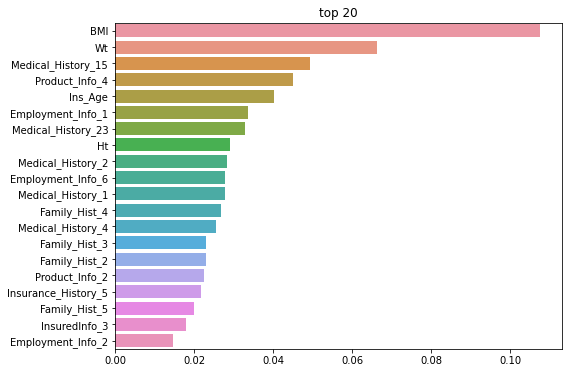

In [11]:
#파라미터 시각화
import seaborn as sns
franks_val = model2.feature_importances_
franks = pd.Series(franks_val, index=X_train.columns)
top20 = franks.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('top 20')
sns.barplot(x=top20, y=top20.index)
plt.show()

In [12]:
#처음 예상
# 보험정보4, 나이, bmi, 직장3, 보험정보6 보험이력2, 의료1, 의료이력4 등은 관계가 크고
# 그 외 직장, 가족력 등은 그다지 크지 않은것 같다.

In [13]:
#Adaboost 잘 안 됨.
from sklearn.ensemble import AdaBoostClassifier

model3 = AdaBoostClassifier(n_estimators=30, 
                        random_state=42, 
                        learning_rate=0.1)

model3.fit(X_train, y_train)

print('학습', model3.score(X_train,y_train))
print('검증', model3.score(X_test,y_test))

학습 0.44291007073088584
검증 0.4403468889450198


In [14]:
#GBM 오래걸리네. 랜덤보다 잘 맞춤
from sklearn.ensemble import GradientBoostingClassifier 

model3 = GradientBoostingClassifier(random_state=42)

model3.fit(X_train, y_train)

print('학습', model3.score(X_train,y_train))
print('검증', model3.score(X_test,y_test))

학습 0.6021387672617042
검증 0.5767449692683337


In [ ]:
!pip install catboost
!pip install ipywidgets

In [ ]:
#XGBoot해보자
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [17]:
model3=xgb.XGBClassifier(booster='gbtree', 
                    colsample_bylevel=0.9, 
                    colsample_bytree=0.8, 
                    gamma=0, 
                    max_depth=8, 
                    min_child_weight=3, 
                    n_estimators=30, 
                    nthread=4, 
                    objective='binary:logistic', 
                    # objective='reg:linear', 
                    # objective='multi:softmax', 
                    # objective='multi:softprob', 
                    random_state=42, 
                    silent= True)

model3.fit(X_train, y_train)

print('학습', model3.score(X_train,y_train))
print('검증', model3.score(X_test,y_test))

KeyboardInterrupt: ignored

In [ ]:
#라이트 gbm
model3=LGBMClassifier(random_state=42)

model3.fit(X_train, y_train)

print('학습', model3.score(X_train,y_train))
print('검증', model3.score(X_test,y_test))

In [ ]:
#catboot 그다지....
#ierations 높으면 높아지기는 한다... 오래걸림.
model3=CatBoostClassifier(iterations=30, logging_level='Silent')

model3.fit(X_train, y_train)

print('학습', model3.score(X_train,y_train))
print('검증', model3.score(X_test,y_test))

In [ ]:
#참조 코랩에서 lightGBM gpu가속하려면 가속 버전 깔아야 함.
# https://towardsdatascience.com/pycaret-2-2-is-here-whats-new-ad7612ca63b
#uninstall lightgbm CPU
#!pip uninstall lightgbm -y
# install lightgbm GPU
#!pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

In [ ]:
!pip install pycaret
!jupyter nbextension enable --py widgetsnbextension

In [24]:
#pycaret
from pycaret.classification import *
from pycaret.utils import enable_colab
enable_colab()

data = pd.read_csv("/content/drive/MyDrive/insurance/train.csv")
#clf1 = setup(data=data, target='Response', session_id=123, use_gpu = True)
clf1 = setup(data=data, target='Response', session_id=123)

,Description,Value
0,session_id,123
1,Target,Response
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7"
4,Original Data,"(59381, 128)"
5,Missing Values,True
6,Numeric Features,22
7,Categorical Features,105
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
#모델 비교
# compare_models(include = ['dt','rf','xgboost', 'lightgbm', 'catboost'])\
compare_models(include = ['dt','rf','lightgbm'])
#참조 : https://pycaret.org/create-model/
#모든 모델
#compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5914,0.8655,0.5050,0.5697,0.5688,0.4773,0.4827,10.675
rf,Random Forest Classifier,0.5688,0.8456,0.4822,0.5456,0.5385,0.4445,0.4525,17.850
dt,Decision Tree Classifier,0.4412,0.6614,0.3850,0.4429,0.4418,0.3074,0.3074,2.185


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# !pip install tune-sklearn ray[tune]

In [25]:
#파라미터 최적화
# train dt using default hyperparameters
#dt = create_model('dt')
rf = create_model('rf')
# tune hyperparameters with scikit-learn (default)
#tuned_dt_sklearn = tune_model(dt)
# tune hyperparameters with scikit-optimize
#tuned_dt_skopt = tune_model(dt, search_library = 'scikit-optimize')
# tune hyperparameters with optuna
#tuned_dt_optuna = tune_model(dt, search_library = 'optuna')
# tune hyperparameters with tune-sklearn
#tuned_dt_tuneskl = tune_model(dt, search_library = 'tune-sklearn') #로칼에서도 안되더라.


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5576,0.8382,0.4776,0.5309,0.5267,0.4293,0.4374
1,0.5680,0.8468,0.4729,0.5405,0.5368,0.4446,0.4518
2,0.5761,0.8493,0.4785,0.5544,0.5475,0.4544,0.4620
3,0.5639,0.8426,0.4852,0.5410,0.5333,0.4386,0.4463
4,0.5706,0.8443,0.4899,0.5518,0.5402,0.4463,0.4548
5,0.5711,0.8477,0.4786,0.5470,0.5419,0.4473,0.4551
6,0.5806,0.8474,0.5013,0.5589,0.5505,0.4599,0.4679
7,0.5563,0.8405,0.4716,0.5281,0.5220,0.4265,0.4355
8,0.5676,0.8487,0.4662,0.5453,0.5398,0.4441,0.4511
9,0.5765,0.8508,0.5005,0.5577,0.5458,0.4543,0.4629


In [ ]:
!pip install optuna

In [30]:
tuned_rf_tuneskl = tune_model(rf, search_library = 'optuna')
#tune-sklearn 잘 안 됨 코랩이라서?
#무척 오래 걸린다.
#좋은 컴퓨터 필수
#그다지 튜닝된거 같지 않다.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5641,0.8354,0.4924,0.5370,0.5250,0.4361,0.4463
1,0.5682,0.8422,0.4906,0.5458,0.5302,0.4432,0.4522
2,0.5785,0.8475,0.4888,0.5587,0.5424,0.4568,0.4659
3,0.5634,0.8412,0.4820,0.5342,0.5228,0.4369,0.4462
4,0.5665,0.8402,0.4837,0.5421,0.5286,0.4409,0.4499
5,0.5790,0.8412,0.5031,0.5613,0.5455,0.4572,0.4662
6,0.5813,0.8448,0.5048,0.5562,0.5436,0.4599,0.4691
7,0.5606,0.8324,0.4716,0.5339,0.5187,0.4309,0.4416
8,0.5760,0.8467,0.4761,0.5589,0.5431,0.4547,0.4627
9,0.5722,0.8456,0.4981,0.5531,0.5313,0.4484,0.4578
